# Dependencies

In [2]:
%matplotlib widget
from astropy.coordinates import SkyCoord, FK5
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
import numpy as np
from catalog_compare import catalog_comparison, match
import os

# MPA-JHU DATA

## Viewing the data

In [8]:
InfoTable = Table.read('/Users/javieratoro/Desktop/proyecto 2024-2/MPA-JHU/galSpecInfo-dr8.fits', format='fits')
InfoTable = InfoTable[['SPECOBJID', 'RA', 'DEC', 'Z', 'Z_ERR', 'RELIABLE', 'PRIMTARGET', 'SECTARGET',
             'TARGETTYPE', 'SPECTROTYPE', 'SUBCLASS', 'Z_WARNING']].to_pandas()
InfoTable

,SPECOBJID,RA,DEC,Z,Z_ERR,RELIABLE,PRIMTARGET,SECTARGET,TARGETTYPE,SPECTROTYPE,SUBCLASS,Z_WARNING
0,b'299489676975171584 ',146.714203,-1.041304,0.021275,0.000009,1,96,0,b'GALAXY ',b'GALAXY',b' ',0
1,b'299489951853078528 ',146.919449,-0.990492,0.213925,0.000052,1,64,0,b'GALAXY ',b'GALAXY',b' ',0
2,b'299490226730985472 ',146.902283,-0.984913,0.652181,0.000133,0,0,0,b'SERENDIPITY_BLUE ',b'QSO ',b'BROADLINE ',0
3,b'299490501608892416 ',146.859833,-0.808902,0.126554,0.000062,1,96,0,b'GALAXY ',b'GALAXY',b' ',0
4,b'299490776486799360 ',146.763397,-0.810433,0.448645,0.000168,1,32,0,b'GALAXY ',b'GALAXY',b' ',0
...,...,...,...,...,...,...,...,...,...,...,...,...
1843195,b' ',0.000000,0.000000,0.000000,0.000000,0,0,0,b' ',b' ',b' ',0
1843196,b' ',0.000000,0.000000,0.000000,0.000000,0,0,0,b' ',b' ',b' ',0
1843197,b' ',0.000000,0.000000,0.000000,0.000000,0,0,0,b' ',b' ',b' ',0
1843198,b' ',0.000000,0.000000,0.000000,0.000000,0,0,0,b' ',b' ',b' ',0


In [ ]:
LineTable = Table.read('/Users/javieratoro/Desktop/proyecto 2024-2/MPA-JHU/galSpecLine-dr8.fits', format='fits').to_pandas()
LineTable

,SPECOBJID,MJD,PLATEID,FIBERID,SIGMA_BALMER,SIGMA_BALMER_ERR,SIGMA_FORBIDDEN,SIGMA_FORBIDDEN_ERR,V_OFF_BALMER,V_OFF_BALMER_ERR,...,OII_FLUX,OII_FLUX_ERR,OII_VOFF,OII_CHI2,OIII_SIGMA,OIII_FLUX,OIII_FLUX_ERR,OIII_VOFF,OIII_CHI2,SPECTOFIBER
0,b'299489676975171584 ',51602,266,1,140.690125,4.170585,135.849838,6.414793,-0.882822,4.030681,...,-466.379456,399412.125000,43.492863,0.249974,111.125435,68.174095,7.386366,-35.293663,0.671645,0.768941
1,b'299489951853078528 ',51602,266,2,77.367538,30.588966,127.082863,30.271038,0.775093,27.307035,...,26.131104,469.464447,-30.449120,0.511616,55.030731,2.864762,2.559604,300.000000,0.356733,0.786842
2,b'299490226730985472 ',51602,266,3,500.000000,-0.000000,130.809418,12.581849,-31.929222,42.718376,...,12.926446,10.988908,-54.456585,1.007290,126.656662,87.105797,6.679164,59.317154,1.521129,0.918886
3,b'299490501608892416 ',51602,266,4,500.000000,-0.000000,250.184357,47.851849,300.000000,-0.000000,...,12.239431,42.013542,300.000000,0.901412,288.318573,21.261919,5.555132,150.371124,0.438892,0.803272
4,b'299490776486799360 ',51602,266,5,500.000000,-0.000000,1.000000,-0.000000,-300.000000,-0.000000,...,0.797444,1.942454,-146.677582,1.307248,1.000000,-0.211065,1.906883,-97.517990,1.718731,0.811374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843195,b' ',-1,-1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1843196,b' ',-1,-1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1843197,b' ',-1,-1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1843198,b' ',-1,-1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
ExtraTable = Table.read('/Users/javieratoro/Desktop/proyecto 2024-2/MPA-JHU/galSpecExtra-dr8.fits', format='fits').to_pandas()
ExtraTable

,SPECOBJID,PLATEID,MJD,FIBERID,BPTCLASS,LGM_TOT_P2P5,LGM_TOT_P16,LGM_TOT_P50,LGM_TOT_P84,LGM_TOT_P97P5,...,SPECSFR_TOT_P50,SPECSFR_TOT_P84,SPECSFR_TOT_P97P5,SPECSFR_TOT_ENTROPY,SPECSFR_FIB_P2P5,SPECSFR_FIB_P16,SPECSFR_FIB_P50,SPECSFR_FIB_P84,SPECSFR_FIB_P97P5,SPECSFR_FIB_ENTROPY
0,b'299489676975171584 ',266,51602,1,3,10.124110,10.202774,10.294701,10.389574,10.476274,...,-10.874370,-10.454710,-9.965384,-5.592138,-13.750000,-11.970732,-11.107513,-10.640601,-10.168965,-5.807676
1,b'299489951853078528 ',266,51602,2,-1,10.943877,11.042439,11.162018,11.284745,11.420699,...,-11.567741,-10.802381,-10.270238,-6.323584,-14.546667,-13.275001,-11.868675,-11.096316,-10.615625,-6.285115
2,b'299490226730985472 ',266,51602,3,-1,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
3,b'299490501608892416 ',266,51602,4,-1,11.231741,11.298348,11.373624,11.466687,11.550502,...,-12.572567,-11.626812,-11.017391,-6.295079,-14.736842,-13.698148,-12.473809,-11.535442,-10.910714,-6.321564
4,b'299490776486799360 ',266,51602,5,-1,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843195,b' ',-1,-1,-1,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1843196,b' ',-1,-1,-1,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1843197,b' ',-1,-1,-1,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1843198,b' ',-1,-1,-1,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
SDSS_tab = pd.concat((InfoTable, LineTable), axis=1)
SDSS_tab = pd.concat((SDSS_tab, ExtraTable), axis=1)

## Select galaxies from the Table and clean sources

### Coords and AGN cut

In [11]:
mask_coords = (SDSS_tab['RA']>-99) & (SDSS_tab['DEC']>-99) & (SDSS_tab['RELIABLE'] == 1.)

AGN_mask = ~((SDSS_tab['SUBCLASS'] == b'AGN                  ') | (SDSS_tab['SUBCLASS'] == b'AGN BROADLINE        '))

### SNR cut

In [12]:
SDSS_tab['OIII_5007_SNR'] = SDSS_tab['OIII_5007_FLUX'] / SDSS_tab['OIII_5007_FLUX_ERR']
SDSS_tab['NII_6584_SNR'] = SDSS_tab['NII_6584_FLUX'] / SDSS_tab['NII_6584_FLUX_ERR']
SDSS_tab['H_ALPHA_SNR'] = SDSS_tab['H_ALPHA_FLUX'] / SDSS_tab['H_ALPHA_FLUX_ERR']
SDSS_tab['H_BETA_SNR'] = SDSS_tab['H_BETA_FLUX'] / SDSS_tab['H_BETA_FLUX_ERR']


SNR_mask = ((SDSS_tab['OIII_5007_SNR'] > 5.) & (SDSS_tab['NII_6584_SNR'] > 5.) &
            (SDSS_tab['H_ALPHA_SNR'] > 5.) & (SDSS_tab['H_BETA_SNR'] > 5.))

In [13]:
SDSS_tab = SDSS_tab[mask_coords & AGN_mask & SNR_mask]

### properties

In [14]:
SDSS_tab['R3_S'] = np.log10(SDSS_tab['OIII_5007_FLUX'] / SDSS_tab['H_BETA_FLUX'])
SDSS_tab['N2_S'] = np.log10(SDSS_tab['NII_6584_FLUX'] / SDSS_tab['H_ALPHA_FLUX'])
SDSS_tab['R3_S_ERR'] = (1 / np.log(10))*((SDSS_tab['OIII_5007_FLUX_ERR'] / SDSS_tab['OIII_5007_FLUX']) ** 2
                      + (SDSS_tab['H_BETA_FLUX_ERR'] / SDSS_tab['H_BETA_FLUX']) ** 2) ** (1 / 2)
SDSS_tab['N2_S_ERR'] = (1 / np.log(10))*((SDSS_tab['NII_6584_FLUX_ERR'] / SDSS_tab['NII_6584_FLUX']) ** 2
                      + (SDSS_tab['H_ALPHA_FLUX_ERR'] / SDSS_tab['H_ALPHA_FLUX']) ** 2) ** (1 / 2)

### BPT Diagram and cut 

In [15]:
def steidel(x):
    return 0.66 / (x - 0.31) + 1.14 -0.05

def kewley(x):
    return 0.61 / (x - 0.47) + 1.19


bpt_selection = ((SDSS_tab['R3_S'] > steidel(SDSS_tab['N2_S'])) & (SDSS_tab['N2_S'] < -0.5) &
                (SDSS_tab['R3_S'] < kewley(SDSS_tab['N2_S'])))
SDSS_bpt_selected = SDSS_tab[bpt_selection]

In [16]:
def bpt_plot(N_ratio, O_ratio, contour=True, compare=False):
    fig = plt.figure()

    if contour is True:
        H, xedges, yedges = np.histogram2d(SDSS_tab['N2_S'], SDSS_tab['R3_S'], bins=150)
        levels = np.logspace(1.2, np.log10(H.max()), 10)
        plt.contour(H.T, levels=levels, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], colors='#5E4140')

    if compare is True:
        plt.scatter(SDSS_bpt_selected['N2_S'], SDSS_bpt_selected['R3_S'],
                    s=0.5, color='teal', alpha=0.4)

    plt.scatter(N_ratio, O_ratio, s=3, color='coral')

    x = np.linspace(-2.5, -0.5, 1900)
    plt.plot(x, steidel(x), color='#5E4140')
    plt.plot(x, kewley(x), color='#5E4140' )
    plt.plot((-0.5, -0.5), (np.min(kewley(x)), np.min(steidel(x))), color='#5E4140')

    plt.ylim(-1., 1.)
    plt.xlim(-2., 0.5)
    plt.xlabel('log([NII]/H_a)')
    plt.ylabel('log([OIII]/H_b)')
    plt.show()


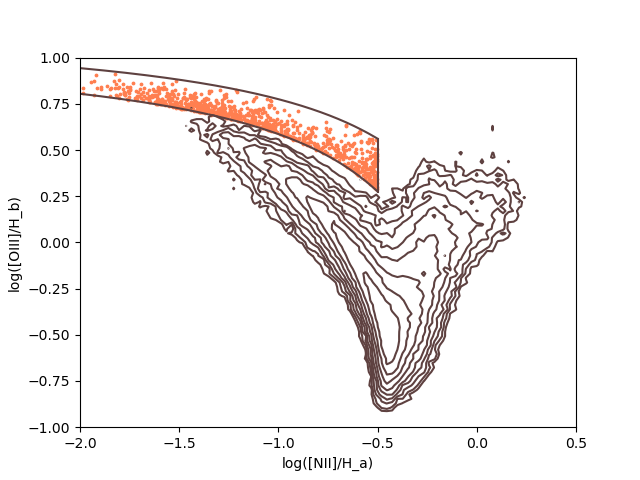

In [17]:
bpt_plot(SDSS_bpt_selected['N2_S'], SDSS_bpt_selected['R3_S'])

## Nava galaxies on SDSS

In [18]:
nava_objects= ['00h21m01.02s +00d52m48.11s', '00h23m39.61s -09d48m48.72s', '01h36m30.59s -00d37m55.97s',
              '02h40m52.19s -08d28m27.41s', '02h52m34.29s +01d14m43.94s', '03h05m35.11s +00d40m59.24s',
              '09h50m23.31s +00d42m29.25s', '11h46m49.33s +00d53m46.09s', '12h26m11.89s +04d15m36.07s',
              '14h44m41.37s +04d09m41.73s', '14h48m05.38s -01d10m57.68s', '16h24m10.11s -00d22m02.60s',
              '21h01m14.39s -05d55m10.29s', '21h19m58.30s +00d52m33.55s', '22h12m43.05s +00d06m48.55s',
              '22h15m23.05s +00d02m46.79s', '22h25m10.13s -00d11m52.89s', '23h37m51.93s -00d10m00.50s']

SkyCoords_nava = [SkyCoord(i, frame=FK5, equinox='J2000.0') for i in nava_objects]
SkyCoords_nava = SkyCoord(SkyCoords_nava)

In [19]:
SkyCoords_SDSS = SkyCoord(ra=SDSS_bpt_selected.RA, dec=SDSS_bpt_selected.DEC, unit='deg', frame=FK5, equinox='J2000.0')

In [20]:
max_sep = 2*u.arcsec
catalog_match, under, over, unmatched = catalog_comparison(max_sep, SkyCoords_nava, SkyCoords_SDSS)
index, sep1 = match(SkyCoords_nava, SkyCoords_SDSS)

In [21]:
sep1.arcsec

array([0.13288602, 0.1850033 , 0.06414936, 0.14695203, 0.13994794,
       0.15584589, 0.19212802, 0.19833673, 0.09836225, 0.0610245 ,
       0.04030436, 0.11361237, 0.05588187, 0.09491417, 0.14230071,
       0.10285448, 0.05365337, 0.08896241])

In [22]:
sdss_analogs = SDSS_bpt_selected.iloc[index]
sdss_analogs

,SPECOBJID,RA,DEC,Z,Z_ERR,RELIABLE,PRIMTARGET,SECTARGET,TARGETTYPE,SPECTROTYPE,...,SPECSFR_FIB_P97P5,SPECSFR_FIB_ENTROPY,OIII_5007_SNR,NII_6584_SNR,H_ALPHA_SNR,H_BETA_SNR,R3_S,N2_S,R3_S_ERR,N2_S_ERR
90044,b'439223316213950464 ',5.254286,0.880023,0.098398,0.000011,1,4,0,b'QSO ',b'GALAXY',...,-7.207907,-4.275826,273.227966,180.899338,288.854401,218.104477,0.635548,-1.041750,0.002548,0.002833
284621,b'735339668748396544 ',5.915092,-9.813522,0.053035,0.000005,1,4,0,b'QSO ',b'GALAXY',...,-7.650739,-3.601265,168.275406,54.212391,166.869583,120.736320,0.794038,-1.628973,0.004427,0.008423
823766,b'1691125637219117056',24.127474,-0.632222,0.059468,0.000005,1,192,0,b'GALAXY ',b'GALAXY',...,-7.899390,-3.639986,127.909592,17.077028,136.154785,90.163994,0.858043,-1.782569,0.005893,0.025631
150065,b'513494502204270592 ',40.217499,-8.474285,0.082218,0.000007,1,5,0,b'QSO ',b'GALAXY',...,-7.187820,-4.449047,169.801880,63.118370,154.766083,134.887634,0.857585,-1.534407,0.004112,0.007431
321683,b'797248221209454592 ',43.142914,1.245541,0.027945,0.000004,1,2,0,b'QSO ',b'GALAXY',...,-8.092661,-3.053003,126.216660,23.969604,128.166489,79.677673,0.865039,-1.732835,0.006446,0.018433
322503,b'798423599642863616 ',46.396332,0.683104,0.085573,0.000006,1,2,0,b'QSO ',b'GALAXY',...,-8.050574,-4.401502,138.361618,34.714832,141.262482,71.896851,0.740713,-1.317919,0.006807,0.012883
1700,b'300731025703593984 ',147.597183,0.708133,0.097702,0.000006,1,4,0,b'QSO ',b'GALAXY',...,-7.005952,-4.715830,155.787582,72.113159,164.318787,114.017189,0.739335,-1.248647,0.004720,0.006577
15291,b'318786936665827328 ',176.705582,0.896104,0.056519,0.000004,1,1,0,b'QSO ',b'GALAXY',...,-7.790000,-3.733890,113.727974,9.360167,114.209908,80.172935,0.841534,-2.086792,0.006628,0.046554
1629534,b'3242617920756410368',186.549576,4.260018,0.094233,0.000005,1,2,0,b'QSO ',b'GALAXY',...,-7.476315,-4.455638,140.076035,38.590099,130.953125,105.217941,0.827858,-1.631565,0.005162,0.011733
237294,b'661039343871223808 ',221.172363,4.161592,0.038811,0.000008,1,1,0,b'QSO ',b'GALAXY',...,-7.606493,-4.072178,81.836494,12.090849,93.915840,74.137283,0.862350,-2.025090,0.007904,0.036216


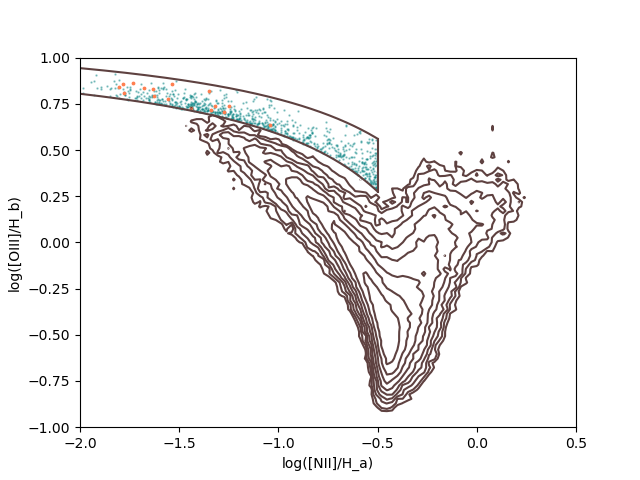

In [23]:
bpt_plot(sdss_analogs.N2_S, sdss_analogs.R3_S, compare=True)

# MagE Data

In [26]:
nava_fluxes = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/nava_data/em_lines_final.csv')
nava_metal = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/nava_data/metals_lines.csv')
nava_extra = pd.read_csv('/Users/javieratoro/Desktop/proyecto 2024-2/nava_data/extra_nava.csv')

In [27]:
magE_full = pd.concat((nava_fluxes, nava_metal, nava_extra), axis=1)
magE_full

,galname,[OII]3726,[OII]3726_err,[OII]3729,[OII]3729_err,[NeIII]3868,[NeIII]3868_err,Hd,Hd_err,Hg,...,log_M,log_SFR,Av,ne,chi2,Age_Gyr_err,log_M_err,log_SFR_err,Av_err,ne_err
0,J0021,3.823923e-14,5.526390e-16,5.857154e-14,4.944178e-16,2.329630e-14,1.303663e-16,1.589044e-14,9.834810e-17,2.994251e-14,...,9.06,1.49,0.890,320.82,0.007,3.0,0.29,0.07,0.15000,428.04
1,J0023,9.828746e-15,4.934884e-17,1.349291e-14,5.749425e-17,7.107733e-15,3.663176e-17,3.491771e-15,2.580392e-17,6.438422e-15,...,8.49,0.67,0.930,507.99,3.527,2.1,0.06,0.04,0.00400,472.35
2,J0136,6.147520e-15,1.028232e-16,8.280123e-15,1.147737e-16,6.428050e-15,6.999673e-17,2.518292e-15,4.848404e-17,5.012953e-15,...,7.79,0.03,0.929,539.32,1.960,3.0,0.13,0.05,0.01900,472.65
3,J0240,1.057139e-14,1.559941e-16,9.884649e-15,1.590730e-16,1.938736e-14,1.253475e-16,9.876136e-15,8.009894e-17,1.733873e-14,...,7.87,0.62,0.780,478.82,0.910,3.0,0.22,0.11,0.29000,467.72
4,J0252,4.105277e-15,1.092878e-16,6.235837e-15,1.189895e-16,5.522981e-15,7.980163e-17,2.327837e-15,5.184054e-17,4.459339e-15,...,7.27,-0.55,0.930,480.21,2.775,1.9,0.05,0.04,0.00200,470.70
5,J0305,9.361605e-15,2.181329e-16,1.202482e-14,2.479706e-16,5.692027e-15,1.003030e-16,3.183953e-15,7.527161e-17,5.833526e-15,...,8.09,0.27,0.930,406.37,2.813,2.0,0.04,0.04,0.00100,457.19
6,J0950,1.449779e-14,9.764389e-17,1.718443e-14,9.607528e-17,8.562469e-15,4.457028e-17,3.481521e-15,2.150345e-17,5.295931e-15,...,8.51,0.99,0.870,331.40,0.019,3.0,0.31,0.08,0.19000,432.39
7,J1146,7.950874e-16,8.548655e-18,1.157787e-15,1.000306e-17,1.474707e-15,8.927041e-18,4.617695e-16,3.704559e-18,8.392631e-16,...,7.65,-0.09,0.930,495.52,2.892,3.0,0.15,0.05,0.04000,472.08
8,J1226,1.124324e-14,5.246664e-17,1.375643e-14,5.329261e-17,1.493265e-14,5.542594e-17,5.756431e-15,2.343113e-17,9.243072e-15,...,8.15,0.68,0.790,348.67,0.063,3.0,0.31,0.11,0.28000,438.91
9,J1444,2.589262e-15,4.264256e-17,3.366641e-15,4.206797e-17,7.565282e-15,6.227745e-17,2.405109e-15,2.333143e-17,3.974723e-15,...,6.83,-0.66,0.290,435.93,2.644,3.1,0.30,0.16,0.26000,463.81


In [28]:
sdss_analogs['LGM_TOT_P5016_ERR'] = np.abs(sdss_analogs.LGM_TOT_P50.values -  sdss_analogs.LGM_TOT_P16.values)
sdss_analogs['SFR_TOT_P5016_ERR'] = np.abs(sdss_analogs.SFR_TOT_P50.values -  sdss_analogs.SFR_TOT_P16.values)

/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/409969354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdss_analogs['LGM_TOT_P5016_ERR'] = np.abs(sdss_analogs.LGM_TOT_P50.values -  sdss_analogs.LGM_TOT_P16.values)
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/409969354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdss_analogs['SFR_TOT_P5016_ERR'] = np.abs(sdss_analogs.SFR_TOT_P50.values -  sdss_analogs.SFR_TOT_P16.values)


# Save

In [30]:
names = ['J0021+0052', 'J0023-0948', 'J0136-0037', 'J0240-0828', 'J0252+0114',
          'J0305+0040', 'J0950+0042', 'J1146+0053', 'J1226+0415', 'J1444+0409',
          'J1448-0110', 'J1624-0022', 'J2101-0555', 'J2119+0052', 'J2212+0006','J2215+0002', 'J2225-0011', 'J2337-0010']

master = pd.DataFrame({
    'ID': names,
    'magE_RA': SkyCoords_nava.ra.deg,
    'magE_DEC': SkyCoords_nava.dec.deg,
    'sdss_RA': sdss_analogs.RA,
    'sdss_DEC': sdss_analogs.DEC,
    'sdss_data': np.full(18, 'sdss')
})


master = pd.concat((master.reset_index(drop=True), sdss_analogs.reset_index(drop=True)), axis=1)

master

master['magE'] = np.full(18, 'magE')

master = pd.concat((master, magE_full), axis=1)

In [31]:
sdss_analogs.RA, sdss_analogs.DEC

(90044        5.254286
 284621       5.915092
 823766      24.127474
 150065      40.217499
 321683      43.142914
 322503      46.396332
 1700       147.597183
 15291      176.705582
 1629534    186.549576
 237294     221.172363
 463934     222.022415
 74426      246.042145
 273678     315.309967
 509193     319.992950
 586038     333.179413
 586110     333.846069
 78837      336.292206
 304811     354.466370
 Name: RA, dtype: float32,
 90044      0.880023
 284621    -9.813522
 823766    -0.632222
 150065    -8.474285
 321683     1.245541
 322503     0.683104
 1700       0.708133
 15291      0.896104
 1629534    4.260018
 237294     4.161592
 463934    -1.182700
 74426     -0.367383
 273678    -5.919530
 509193     0.875979
 586038     0.113483
 586110     0.046320
 78837     -0.198011
 304811    -0.166820
 Name: DEC, dtype: float32)

# Cecilia/MOSFIRE

In [36]:
cecilia = Table.read('/Users/javieratoro/Desktop/proyecto 2024-2/CECILIA/cecilia-cat.fits')
cecilia

LABEL,RA,DEC,ZNEB,LMSTAR,EBMV_SED,SFR_SED,SIZE,SIZEERR,MOS_CAT,FHA,EHA,FHB,EHB,FHG,EHG,FHD,EHD,FO3N,EO3N,FN2,EN2,FS2,ES2,FO2,EO2,FNE3,ENE3,F140WMAG,F140WERR,RMAG,RERR,GRERR,UGERR,J1MAG,J1ERR,J2MAG,J2ERR,J3MAG,J3ERR,JMAG,JERR,HSMAG,HSERR,HLMAG,HLERR,HMAG,HERR,KMAG,KERR
bytes6,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float32[2],float32[2],float32[2],float32[2],float32[2],float32[2],float32[2],float32[2],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
BX537,356.6065305,12.8123817,2.3394,9.571939468383789,0.14000000059604645,18.0,0.17,0.00269,2024,7.246860027313232,0.3468315005302429,4.196959972381592,0.5677238702774048,0.0,0.0,0.0,0.0,5.4622197 .. 16.41752,0.58642054 .. 1.762366,0.14817 .. 0.445857,0.039502356 .. 0.11865019,0.59402704 .. 0.620967,0.13577522 .. 0.1286514,1.657712 .. 2.044343,0.17379923 .. 0.23067436,1.6021180152893066,0.37481942772865295,23.92289924621582,0.009200000204145908,24.440000534057617,0.12999999523162842,0.33000001311302185,0.07000000029802322,24.09400177001953,0.28374096751213074,24.203201293945312,0.26808470487594604,23.910600662231445,0.23491781949996948,24.515300750732422,0.10718946158885956,99.0,99.0,23.067401885986328,0.19839034974575043,24.193700790405273,0.2756156325340271,23.47490119934082,0.10217147320508957
BX348,356.6143693,12.7864318,2.4491,10.021806716918945,0.3100000023841858,65.0,0.08,0.12013,2024,13.35478401184082,0.5435817241668701,5.085042953491211,0.22627273201942444,2.5981392860412598,0.14680328965187073,0.0,0.0,4.793712 .. 14.407622,0.20371918 .. 0.6122924,1.0810361 .. 3.2458587,0.05514015 .. 0.16550489,1.0796608 .. 0.8926112,0.16782127 .. 0.14733374,4.1027956 .. 2.218178,0.30560505 .. 0.20940746,0.1544385701417923,0.07781863212585449,23.386899948120117,0.006800000090152025,24.649999618530273,0.15000000596046448,0.5,0.10000000149011612,24.419300079345703,0.31618598103523254,24.019800186157227,0.24037064611911774,23.903099060058594,0.2267657369375229,24.132200241088867,0.09196243435144424,99.0,99.0,23.136699676513672,0.19746677577495575,23.421100616455078,0.19246084988117218,23.170000076293945,0.09093035757541656
RK120,356.6093603,12.8239555,2.3503,0.0,0.0,0.0,0.25,0.00403,2024,12.732908248901367,1.281119465827942,1.0216699838638306,0.125363290309906,0.0,0.0,0.0,0.0,0.836035 .. 2.50675,0.090275854 .. 0.27071655,0.99819714 .. 2.9867315,0.113169596 .. 0.33882403,1.6348425 .. 0.9687228,0.28153393 .. 0.22058687,4.0198 .. 2.4442,0.5498583 .. 0.419467,0.06807400286197662,0.190477192401886,23.218000411987305,0.006500000134110451,24.799999237060547,0.15000000596046448,9999.0,0.10999999940395355,24.002099990844727,0.3181207776069641,23.657499313354492,0.2536908686161041,23.40679931640625,0.22971473634243011,23.605998992919922,0.1214890107512474,99.0,99.0,22.654298782348633,0.2055208683013916,23.131500244140625,0.21407563984394073,22.54279899597168,0.12032967060804367
BX418,999.9999999,99.9999999,-1.0,9.43721866607666,0.0,8.0,-999.0,9999.0,2024,11.773892402648926,0.2659141719341278,5.1924943923950195,0.5561158657073975,0.0,0.0,0.0,0.0,12.632958 .. 37.993862,1.2616218 .. 3.7942874,0.16948406 .. 0.50995207,0.030488133 .. 0.09161682,0.28797293 .. 0.4094615,0.111439995 .. 0.12745413,2.46389 .. 2.2915902,0.17788465 .. 0.18115397,1.8263798952102661,0.1639723926782608,24.07360076904297,0.012299999594688416,23.989999771118164,0.10000000149011612,0.10999999940395355,0.05000000074505806,23.897300720214844,0.24021576344966888,24.12220001220703,0.23837247490882874,24.031700134277344,0.22694571316242218,24.597700119018555,0.09786439687013626,99.0,99.0,22.88050079345703,0.16625775396823883,24.052400588989258,0.23963357508182526,23.69070053100586,0.09770342707633972
BX336,356.6231682,12.7847323,2.5445,10.283804893493652,0.1599999964237213,42.0,0.05,0.05342,2024,7.78074645996

In [37]:
cecilia['R3'] = np.log10(cecilia['FO3N'][:, 1] / cecilia['FHB'])

cecilia['N2'] = np.log10(cecilia['FN2'][:, 1] / cecilia['FHA'])

cecilia['S2'] = np.log10(np.sum(cecilia['FS2'], axis=1)/ cecilia['FHA'])

cecilia['R23'] = np.log10( ( np.sum(cecilia['FO3N'], axis=1) +
                  np.sum(cecilia['FO2'], axis=1) ) /
                  cecilia['FHB'] )

cecilia['O32'] = np.log10(  np.sum(cecilia['FO3N'], axis=1) /
                  np.sum(cecilia['FO2'], axis=1)  )

cecilia['N202'] = np.log10( cecilia['FN2'][:, 1] /
                            np.sum(cecilia['FO2'], axis=1) )

cecilia['N2S2'] = np.log10( cecilia['FN2'][:, 1] /
                            np.sum(cecilia['FS2'], axis=1) )

cecilia['O3N2'] = cecilia['R3'] - cecilia['N2']

cecilia['Ne3O2'] = np.log10(cecilia['FNE3'] / np.sum(cecilia['FO2'], axis=1))

/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/2720314054.py:1: RuntimeWarning: invalid value encountered in divide
  cecilia['R3'] = np.log10(cecilia['FO3N'][:, 1] / cecilia['FHB'])
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/2720314054.py:1: RuntimeWarning: divide by zero encountered in log10
  cecilia['R3'] = np.log10(cecilia['FO3N'][:, 1] / cecilia['FHB'])
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/2720314054.py:3: RuntimeWarning: invalid value encountered in divide
  cecilia['N2'] = np.log10(cecilia['FN2'][:, 1] / cecilia['FHA'])
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/2720314054.py:3: RuntimeWarning: invalid value encountered in log10
  cecilia['N2'] = np.log10(cecilia['FN2'][:, 1] / cecilia['FHA'])
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/2720314054.py:5: RuntimeWarning: divide by zero encountered in divide
  cecilia['S2'] = np.log10(np.sum(cecilia['FS2'], axis=1)/ cecil

In [38]:
cecilia['R3_ERR'] = (1/np.log(10)) * np.sqrt( (cecilia['EO3N'][:, 1] ** 2 /
                                            cecilia['FO3N'][:, 1] ** 2) +
                                          (cecilia['EHB'] ** 2 /
                                           cecilia['FHB'] ** 2) )

cecilia['N2_ERR'] = (1/np.log(10)) * np.sqrt( (cecilia['EN2'][:, 1]**2 /
                                            cecilia['EN2'][:, 1]**2) +
                                          (cecilia['EHA']**2 /
                                           cecilia['FHA']**2) )

cecilia['S2_ERR'] = (1/np.log(10)) * np.sqrt( (cecilia['ES2'][:, 0]**2 /
                                            (np.sum(cecilia['FS2'], axis=1))**2) +
                                          (cecilia['ES2'][:, 1]**2 /
                                           (np.sum(cecilia['FS2'], axis=1))**2) +
                                          (cecilia['EHA']**2 / cecilia['FHA']**2) )

cecilia['R23_ERR'] = (1/np.log(10)) * np.sqrt( (cecilia['EO2'][:, 0]**2 /
                                             ( np.sum(cecilia['FO3N'], axis=1) +
                                              np.sum(cecilia['FO2'], axis=1) )**2) +
                                           (cecilia['EO2'][:, 1]**2 /
                                            ( np.sum(cecilia['FO3N'], axis=1) +
                                             np.sum(cecilia['FO2'], axis=1) )**2) +
                                           (cecilia['EO3N'][:, 0]**2 /
                                            ( np.sum(cecilia['FO3N'], axis=1) +
                                             np.sum(cecilia['FO2'], axis=1) )**2) +
                                           (cecilia['EO3N'][:, 1]**2 /
                                            ( np.sum(cecilia['FO3N'], axis=1) +
                                             np.sum(cecilia['FO2'], axis=1) )**2) +
                                           (cecilia['EHB']**2/ cecilia['FHB']**2) )

cecilia['O32_ERR'] = (1/np.log(10)) * np.sqrt( (cecilia['EO2'][:, 0]**2 /
                                             (np.sum(cecilia['FO2'], axis=1) )**2) +
                                           (cecilia['EO2'][:, 1]**2 /
                                            (np.sum(cecilia['FO2'], axis=1) )**2) +
                                           (cecilia['EO3N'][:, 0]**2 /
                                            (np.sum(cecilia['FO3N'], axis=1) )**2) +
                                           (cecilia['EO3N'][:, 1]**2 /
                                            ( np.sum(cecilia['FO3N'], axis=1) )**2) )

cecilia['N2O2_ERR'] =  (1/np.log(10)) * np.sqrt( (cecilia['EN2'][:, 1]**2 /
                                                  cecilia['EN2'][:, 1]**2) +
                                                (cecilia['EO2'][:, 0]**2 /
                                                 (np.sum(cecilia['FO2'], axis=1) )**2) +
                                                (cecilia['EO2'][:, 1]**2 /
                                                 (np.sum(cecilia['FO2'], axis=1) )**2) )

cecilia['N2S2_ERR'] = (1/np.log(10)) * np.sqrt( (cecilia['EN2'][:, 1]**2 /
                                                  cecilia['EN2'][:, 1]**2) +
                                               (cecilia['ES2'][:, 0]**2 /
                                                (np.sum(cecilia['FS2'], axis=1))**2) +
                                               (cecilia['ES2'][:, 1]**2 /
                                                (np.sum(cecilia['FS2'], axis=1))**2) )

cecilia['O3N2_ERR'] = np.sqrt( (cecilia['R3_ERR'])**2 + (cecilia['N2_ERR'])**2)

cecilia['Ne3O2_ERR'] = (1/np.log(10)) * np.sqrt( (cecilia['ENE3'] / cecilia['FNE3'])**2 +
                                               (cecilia['EO2'][:, 0]**2 /
                                                (np.sum(cecilia['FO2'], axis=1) **2)) +
                                                (cecilia['EO2'][:, 1]**2 /
                                                 (np.sum(cecilia['FO2'], axis=1) )**2) )


/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/742067919.py:1: RuntimeWarning: invalid value encountered in divide
  cecilia['R3_ERR'] = (1/np.log(10)) * np.sqrt( (cecilia['EO3N'][:, 1] ** 2 /
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/742067919.py:3: RuntimeWarning: divide by zero encountered in divide
  (cecilia['EHB'] ** 2 /
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/742067919.py:3: RuntimeWarning: invalid value encountered in divide
  (cecilia['EHB'] ** 2 /
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/742067919.py:6: RuntimeWarning: invalid value encountered in divide
  cecilia['N2_ERR'] = (1/np.log(10)) * np.sqrt( (cecilia['EN2'][:, 1]**2 /
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/742067919.py:8: RuntimeWarning: invalid value encountered in divide
  (cecilia['EHA']**2 /
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/742067919.py:11: RuntimeWarning: invalid va

## Save

In [39]:
cecilia.write('mosfire.fits', format='fits', overwrite=True)

# Ratios

In [40]:
def error_sum(num_list, dem_list, name, mage=True):
    if mage is True:
        err_name = '_ERR'
        catalog = master
    else:
        catalog = SDSS_tab
        err_name ='_ERR'

    fluxes = []
    fluxes_err = []

    for i in num_list:
        num = catalog[i]
        num_err = catalog[i + err_name]
        fluxes.append(num)
        fluxes_err.append(num_err)
    for j in dem_list:
        dem = catalog[j]
        dem_err = catalog[j + err_name]
        fluxes.append(dem)
        fluxes_err.append(dem_err)

    fluxes = np.array(fluxes)
    fluxes_err = np.array(fluxes_err)

    value = np.log10(
        np.sum(fluxes[:len(num_list)], axis=0) / np.sum(fluxes[len(num_list):], axis=0)
    )

    num_err = np.sum( (np.array(fluxes_err[:len(num_list)])**2) /
                     (np.sum(fluxes[:len(num_list)])**2), axis=0 )

    dem_err = np.sum( (np.array(fluxes_err[len(num_list):])**2) /
                     (np.sum(fluxes[len(num_list):])**2), axis=0 )

    err = (1/np.log(10)) * (num_err + dem_err)**(1/2)

    if mage is True:
        index = master.columns.get_loc('magE')
        master.insert(index, name, value)
        master.insert(index+1, name + err_name, err)
    else:
        catalog[name] = value
        catalog[name + err_name] = err

In [41]:
error_sum(['OIII_4959_FLUX', 'OIII_5007_FLUX'],
          ['OII_3726_FLUX', 'OII_3729_FLUX'], 'O32_S', mage=True)

In [42]:
error_sum(['NEIII_3869_FLUX'],
         ['OII_3726_FLUX', 'OII_3729_FLUX'], 'Ne3O2_S', mage=True)

In [43]:
error_sum(['NII_6584_FLUX'],
         ['OII_3726_FLUX', 'OII_3729_FLUX'], 'N2O2_S', mage=True)

In [44]:
error_sum(['NII_6584_FLUX'],
         ['SII_6717_FLUX', 'SII_6731_FLUX'], 'N2S2_S', mage=True)

In [45]:
error_sum(['OII_3726_FLUX', 'OII_3729_FLUX', 'OIII_4959_FLUX', 'OIII_5007_FLUX'],
         ['H_ALPHA_FLUX'], 'R23_S', mage=True)

In [46]:
error_sum(['OIII_5007_FLUX'],
         ['NII_6584_FLUX'], 'R3N2_S', mage=True)

In [47]:
O3N2_S = master.R3_S - master.N2_S
O3N2_S_ERR = np.sqrt(master.R3_S_ERR ** 2 + master.N2_S_ERR ** 2)
index = master.columns.get_loc('magE')
master.insert(index, 'O3N2_S', O3N2_S)
master.insert(index+1, 'O3N2_S_ERR', O3N2_S_ERR)

In [48]:
Ne3O2 = np.log10(
    master['[NeIII]3868'] / (master['[OII]3726'] + master['[OII]3729'])
)
Ne3O2_err = (1/np.log(10))*np.sqrt((master['[NeIII]3868_err'] / master['[NeIII]3868']) ** 2 +
                                   (master['[OII]3726_err'] / (master['[OII]3726'] + master['[OII]3729'])) ** 2 +
                                   (master['[OII]3729_err'] / (master['[OII]3726'] + master['[OII]3729'])) ** 2)
index1 = master.columns.get_loc('Unnamed: 0')
master.insert(index1, 'Ne3O2', Ne3O2)
master.insert(index1+1, 'Ne3O2_err', Ne3O2_err)

In [49]:
error_sum(['SII_6717_FLUX', 'SII_6731_FLUX'],
          ['H_ALPHA_FLUX'], 'S2_S', mage=True)

In [50]:
error_sum(['OIII_4959_FLUX', 'OIII_5007_FLUX'],
          ['OII_3726_FLUX', 'OII_3729_FLUX'], 'O32_S', mage=False)

error_sum(['NEIII_3869_FLUX'],
         ['OII_3726_FLUX', 'OII_3729_FLUX'], 'Ne3O2_S', mage=False)

error_sum(['NII_6584_FLUX'],
         ['OII_3726_FLUX', 'OII_3729_FLUX'], 'N2O2_S', mage=False)

error_sum(['NII_6584_FLUX'],
         ['SII_6717_FLUX', 'SII_6731_FLUX'], 'N2S2_S', mage=False)

error_sum(['OII_3726_FLUX', 'OII_3729_FLUX', 'OIII_4959_FLUX', 'OIII_5007_FLUX'],
         ['H_BETA_FLUX'], 'R23_S', mage=False)

error_sum(['OIII_5007_FLUX'],
         ['NII_6584_FLUX'], 'R3N2_S', mage=False)

O3N2_S = SDSS_tab.R3_S - SDSS_tab.N2_S
O3N2_S_ERR = np.sqrt(SDSS_tab.R3_S_ERR ** 2 + SDSS_tab.N2_S_ERR ** 2)
SDSS_tab['O3N2_S'] = O3N2_S
SDSS_tab['O3N2_S_ERR'] = O3N2_S_ERR

Ne3O2 = np.log10(
    SDSS_tab['NEIII_3869_FLUX'] / (SDSS_tab['OII_3726_FLUX'] + SDSS_tab['OII_3729_FLUX'])
)
Ne3O2_err = (1/np.log(10))*np.sqrt((SDSS_tab['NEIII_3869_FLUX_ERR'] / SDSS_tab['NEIII_3869_FLUX']) ** 2 +
                                   (SDSS_tab['OII_3726_FLUX_ERR'] /
                                    (SDSS_tab['OII_3726_FLUX'] + SDSS_tab['OII_3729_FLUX'])) ** 2 +
                                   (SDSS_tab['OII_3729_FLUX_ERR'] /
                                    (SDSS_tab['OII_3726_FLUX'] + SDSS_tab['OII_3729_FLUX'])) ** 2)
SDSS_tab['Ne3O2'] = Ne3O2
SDSS_tab['Ne3O2_err'] = Ne3O2_err

/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/3238309771.py:27: RuntimeWarning: divide by zero encountered in divide
  np.sum(fluxes[:len(num_list)], axis=0) / np.sum(fluxes[len(num_list):], axis=0)
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/3238309771.py:26: RuntimeWarning: invalid value encountered in log10
  value = np.log10(
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/3238309771.py:27: RuntimeWarning: divide by zero encountered in divide
  np.sum(fluxes[:len(num_list)], axis=0) / np.sum(fluxes[len(num_list):], axis=0)
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/3238309771.py:27: RuntimeWarning: invalid value encountered in divide
  np.sum(fluxes[:len(num_list)], axis=0) / np.sum(fluxes[len(num_list):], axis=0)
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/3238309771.py:26: RuntimeWarning: divide by zero encountered in log10
  value = np.log10(
/var/folders/b3/z1vmt1t542ncmpppx7tfrq

In [51]:
error_sum(['SII_6717_FLUX', 'SII_6731_FLUX'],
          ['H_ALPHA_FLUX'], 'S2_S', mage=False)

/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/3238309771.py:26: RuntimeWarning: divide by zero encountered in log10
  value = np.log10(
/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_13076/3238309771.py:26: RuntimeWarning: invalid value encountered in log10
  value = np.log10(


# Master Table

In [53]:
master.to_csv('master.csv', index=True)

master

,ID,magE_RA,magE_DEC,sdss_RA,sdss_DEC,sdss_data,SPECOBJID,RA,DEC,Z,...,log_M,log_SFR,Av,ne,chi2,Age_Gyr_err,log_M_err,log_SFR_err,Av_err,ne_err
0,J0021+0052,5.254250,0.880031,5.254286,0.880023,sdss,b'439223316213950464 ',5.254286,0.880023,0.098398,...,9.06,1.49,0.890,320.82,0.007,3.0,0.29,0.07,0.15000,428.04
1,J0023-0948,5.915042,-9.813533,5.915092,-9.813522,sdss,b'735339668748396544 ',5.915092,-9.813522,0.053035,...,8.49,0.67,0.930,507.99,3.527,2.1,0.06,0.04,0.00400,472.35
2,J0136-0037,24.127458,-0.632214,24.127474,-0.632222,sdss,b'1691125637219117056',24.127474,-0.632222,0.059468,...,7.79,0.03,0.929,539.32,1.960,3.0,0.13,0.05,0.01900,472.65
3,J0240-0828,40.217458,-8.474281,40.217499,-8.474285,sdss,b'513494502204270592 ',40.217499,-8.474285,0.082218,...,7.87,0.62,0.780,478.82,0.910,3.0,0.22,0.11,0.29000,467.72
4,J0252+0114,43.142875,1.245539,43.142914,1.245541,sdss,b'797248221209454592 ',43.142914,1.245541,0.027945,...,7.27,-0.55,0.930,480.21,2.775,1.9,0.05,0.04,0.00200,470.70
5,J0305+0040,46.396292,0.683122,46.396332,0.683104,sdss,b'798423599642863616 ',46.396332,0.683104,0.085573,...,8.09,0.27,0.930,406.37,2.813,2.0,0.04,0.04,0.00100,457.19
6,J0950+0042,147.597125,0.708125,147.597183,0.708133,sdss,b'300731025703593984 ',147.597183,0.708133,0.097702,...,8.51,0.99,0.870,331.40,0.019,3.0,0.31,0.08,0.19000,432.39
7,J1146+0053,176.705542,0.896136,176.705582,0.896104,sdss,b'318786936665827328 ',176.705582,0.896104,0.056519,...,7.65,-0.09,0.930,495.52,2.892,3.0,0.15,0.05,0.04000,472.08
8,J1226+0415,186.549542,4.260019,186.549576,4.260018,sdss,b'3242617920756410368',186.549576,4.260018,0.094233,...,8.15,0.68,0.790,348.67,0.063,3.0,0.31,0.11,0.28000,438.91
9,J1444+0409,221.172375,4.161592,221.172363,4.161592,sdss,b'661039343871223808 ',221.172363,4.161592,0.038811,...,6.83,-0.66,0.290,435.93,2.644,3.1,0.30,0.16,0.26000,463.81


In [54]:
SDSS_tab.to_csv('sdss_contour.csv', index=True)

In [55]:
SDSS_bpt_selected.to_csv('sdss_bpt.csv', index=True)

In [56]:
master.columns.values

array(['ID', 'magE_RA', 'magE_DEC', 'sdss_RA', 'sdss_DEC', 'sdss_data',
       'SPECOBJID', 'RA', 'DEC', 'Z', 'Z_ERR', 'RELIABLE', 'PRIMTARGET',
       'SECTARGET', 'TARGETTYPE', 'SPECTROTYPE', 'SUBCLASS', 'Z_WARNING',
       'SPECOBJID', 'MJD', 'PLATEID', 'FIBERID', 'SIGMA_BALMER',
       'SIGMA_BALMER_ERR', 'SIGMA_FORBIDDEN', 'SIGMA_FORBIDDEN_ERR',
       'V_OFF_BALMER', 'V_OFF_BALMER_ERR', 'V_OFF_FORBIDDEN',
       'V_OFF_FORBIDDEN_ERR', 'OII_3726_CONT', 'OII_3726_CONT_ERR',
       'OII_3726_REQW', 'OII_3726_REQW_ERR', 'OII_3726_EQW',
       'OII_3726_EQW_ERR', 'OII_3726_SEQW', 'OII_3726_SEQW_ERR',
       'OII_3726_FLUX', 'OII_3726_FLUX_ERR', 'OII_3726_INST_RES',
       'OII_3726_CHISQ', 'OII_3729_CONT', 'OII_3729_CONT_ERR',
       'OII_3729_REQW', 'OII_3729_REQW_ERR', 'OII_3729_EQW',
       'OII_3729_EQW_ERR', 'OII_3729_SEQW', 'OII_3729_SEQW_ERR',
       'OII_3729_FLUX', 'OII_3729_FLUX_ERR', 'OII_3729_INST_RES',
       'OII_3729_CHISQ', 'NEIII_3869_CONT', 'NEIII_3869_CONT_ERR',
   

# magE 2024

In [10]:
path = f'/Users/javieratoro/Desktop/proyecto 2024-2/lines/'
magE_2024 = pd.read_csv(path + 'magE2024_master_Dcorr.csv')
magE_2024

,Unnamed: 0,ID,mass,z,H_11_flux,H_11_fluxerr,O2_3725_flux,O2_3725_fluxerr,O2_3727_flux,O2_3727_fluxerr,...,O2_7322_flux,O2_7322_fluxerr,O2_7333_flux,O2_7333_fluxerr,Ni2_7380_flux,Ni2_7380_fluxerr,Ni2_7414_flux,Ni2_7414_fluxerr,Ar3_7753_flux,Ar3_7753_fluxerr
0,8,J0020+0030,9.60,0.105549,18.362974,2.382785,1608.999248,8.822672,1976.903314,8.044083,...,46.172314,1.610816,33.535081,1.692255,6.971420,0.867916,2.898142,0.776841,14.717187,0.702277
1,7,J0203+0035,9.96,0.156159,0.004473,0.019336,503.221955,3.758942,430.461755,4.009044,...,8.129137,1.420579,7.588537,0.672374,2.402689,0.607415,0.201142,0.283619,6.472998,0.760846
2,6,J0243+0111,9.70,0.134418,10.046162,1.368925,625.076916,3.687033,826.136389,4.884554,...,24.504277,2.353521,20.711437,1.567404,4.864828,1.084617,3.900570,1.121778,13.933553,1.080800
3,5,J0033+0017,9.90,0.193810,36.740213,1.467709,979.409373,6.279057,1286.295416,6.606536,...,38.886916,1.013753,36.063437,1.374049,1.232832,0.674307,0.237601,0.395515,37.521943,1.393659
4,4,J2204+0058,10.16,0.184972,10.710859,1.019084,278.277038,2.770451,567.897947,3.063118,...,11.650403,1.245170,9.078183,1.173610,1.912680,0.484837,3.163755,0.607096,2.334112,0.600307
5,3,J2258+0056,9.60,0.094012,8.672617,0.693588,207.106392,1.785136,271.718005,1.851614,...,10.228697,0.570308,9.296888,0.609692,0.373983,0.368959,0.006149,0.016829,5.426648,0.372863
6,2,J2336-0042,9.90,0.170509,6.900970,0.905539,462.346875,2.321498,543.611246,2.465776,...,16.614393,0.684017,11.753056,0.725604,0.405369,0.548927,0.110043,0.235242,13.821329,0.608469
7,1,J0023-0948,8.90,0.053107,35.021257,2.649398,1387.810721,9.578575,1552.414304,24.659186,...,41.067871,1.442375,36.550790,2.014212,3.019341,0.587134,0.422517,0.427434,32.696605,0.919635
8,0,J0136-0037,9.10,0.059450,28.682646,3.793231,636.213429,10.657815,783.016364,9.435731,...,20.407301,2.590558,14.099875,1.711447,0.590004,0.731687,12.131839,2.223887,16.940516,1.833917


In [11]:
magE_2024.columns

Index(['Unnamed: 0', 'ID', 'mass', 'z', 'H_11_flux', 'H_11_fluxerr',
       'O2_3725_flux', 'O2_3725_fluxerr', 'O2_3727_flux', 'O2_3727_fluxerr',
       'H_10_flux', 'H_10_fluxerr', 'H_9_flux', 'H_9_fluxerr', 'H_8_flux',
       'H_8_fluxerr', 'H_7_flux', 'H_7_fluxerr', 'H_6_flux', 'H_6_fluxerr',
       'Ne3_3868_flux', 'Ne3_3868_fluxerr', 'H_epsilon_flux',
       'H_epsilon_fluxerr', 'Ne3_3970_flux', 'Ne3_3970_fluxerr',
       'H_delta_flux', 'H_delta_fluxerr', 'H_gamma_flux', 'H_gamma_fluxerr',
       'O3_4363_flux', 'O3_4363_fluxerr', 'He2_4685_flux', 'He2_4685_fluxerr',
       'H_beta_flux', 'H_beta_fluxerr', 'O3_4959_flux', 'O3_4959_fluxerr',
       'O3_5008_flux', 'O3_5008_fluxerr', 'He2_5411_flux', 'He2_5411_fluxerr',
       'O1_5577_flux', 'O1_5577_fluxerr', 'N2_5756_flux', 'N2_5756_fluxerr',
       'He1_5877_flux', 'He1_5877_fluxerr', 'O1_6300_flux', 'O1_6300_fluxerr',
       'S3_6312_flux', 'S3_6312_fluxerr', 'O1_6363_flux', 'O1_6363_fluxerr',
       'Si2_6373_flux', 'Si2_6373

In [12]:
magE_2024['R3'] = np.log10(magE_2024['O3_5008_flux'] / magE_2024['H_beta_flux'])

magE_2024['R2'] = np.log10(( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] ) /
                           magE_2024['H_beta_flux'] )

magE_2024['N2'] = np.log10(magE_2024['N2_6585_flux'] / magE_2024['H_alpha_flux'])

magE_2024['S2'] = np.log10( (magE_2024['S2_6716_flux'] + magE_2024['S2_6730_flux'] ) /
                           magE_2024['H_alpha_flux'])

magE_2024['R23'] = np.log10((( magE_2024['O3_4959_flux'] + magE_2024['O3_5008_flux'] ) +
                             ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] )) /
                             magE_2024['H_beta_flux'] )
magE_2024['R3N2'] = np.log10( magE_2024['O3_5008_flux'] / magE_2024['N2_6585_flux'] )

magE_2024['N2O2'] = np.log10( magE_2024['N2_6585_flux'] /  magE_2024['O2_3725_flux'])

magE_2024['O32'] = np.log10( ( magE_2024['O3_4959_flux'] + magE_2024['O3_5008_flux'] ) /
                            ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] )  )

magE_2024['N2O2'] = np.log10( magE_2024['N2_6585_flux'] /
                             ( magE_2024['O2_3727_flux']) )

magE_2024['N2S2'] = np.log10( magE_2024['N2_6585_flux'] /
                             (magE_2024['S2_6716_flux'] + magE_2024['S2_6730_flux'] ) +
                             0.264*(magE_2024['N2'])) 

magE_2024['O3N2'] = magE_2024['R3'] - magE_2024['N2']

magE_2024['O3S2'] = magE_2024['R3'] - magE_2024['S2']

magE_2024['Ne3O2'] = np.log10(magE_2024['Ne3_3868_flux'] /
                              ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] ))

magE_2024['O3O2'] = np.log10( magE_2024['O3_5008_flux'] /
                             ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] ) )

/opt/anaconda3/envs/pypeit/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
magE_2024['R3_ERR'] = (1/np.log(10)) * np.sqrt( (magE_2024['O3_5008_fluxerr']  ** 2 / magE_2024['O3_5008_flux']  ** 2) + (magE_2024['H_beta_fluxerr'] ** 2 / magE_2024['H_beta_flux'] ** 2) )


magE_2024['R2_ERR'] = (1/np.log(10)) *  np.sqrt( (magE_2024['O2_3727_fluxerr'] ** 2 /
                                                  (magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux']) ** 2) +
                                                  (magE_2024['O2_3725_fluxerr'] ** 2 /(magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] ) ** 2) +
                                                  (magE_2024['H_beta_fluxerr'] ** 2 /
                                                   magE_2024['H_beta_flux'] ** 2) )


magE_2024['R3N2_ERR'] = (1/np.log(10)) * np.sqrt( (magE_2024['N2_6585_fluxerr'] ** 2 /
                                            magE_2024['N2_6585_flux'] ** 2) +
                                          (magE_2024['O3_5008_fluxerr'] ** 2 /
                                           magE_2024['O3_5008_flux'] ** 2) )

magE_2024['N2O2_ERR'] = (1/np.log(10)) * np.sqrt( (magE_2024['N2_6585_fluxerr'] ** 2 /
                                            magE_2024['N2_6585_flux'] ** 2) +
                                          (magE_2024['O2_3725_fluxerr'] ** 2 /
                                           magE_2024['O2_3725_flux'] ** 2) )


magE_2024['N2_ERR'] = (1/np.log(10)) * np.sqrt( (magE_2024['N2_6585_fluxerr'] ** 2 /
                                            magE_2024['N2_6585_flux'] ** 2) +
                                          (magE_2024['H_alpha_fluxerr'] ** 2 /
                                           magE_2024['H_alpha_flux'] ** 2) )

magE_2024['S2_ERR'] = (1/np.log(10)) * np.sqrt( (magE_2024['S2_6716_fluxerr'] ** 2 /
                                            (magE_2024['S2_6716_flux'] + magE_2024['S2_6730_flux']) ** 2) +
                                          (magE_2024['S2_6730_fluxerr'] ** 2 /
                                           (magE_2024['S2_6716_flux'] + magE_2024['S2_6730_flux'] ) ** 2) +
                                          (magE_2024['H_alpha_fluxerr'] ** 2 /
                                           magE_2024['H_alpha_flux'] ** 2) )

magE_2024['R23_ERR'] = (1/np.log(10)) * np.sqrt( ( magE_2024['O2_3727_fluxerr']**2 /
                                             ( ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] ) +
                                              ( magE_2024['O3_4959_flux'] + magE_2024['O3_5008_flux'] ))**2) +
                                           (magE_2024['O2_3725_fluxerr'] **2 /
                                            ( ( magE_2024['O3_4959_flux'] + magE_2024['O3_5008_flux'] ) +
                                             ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] ))**2) +
                                           ( magE_2024['O3_4959_fluxerr']**2 /
                                            ( ( magE_2024['O3_4959_flux'] + magE_2024['O3_5008_flux'] ) +
                                             ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] ))**2) +
                                           (( magE_2024['O3_5008_fluxerr'] )**2 /
                                            ( ( magE_2024['O3_4959_flux'] + magE_2024['O3_5008_flux'] ) +
                                             ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] ))**2) +
                                           (  (magE_2024['H_beta_fluxerr'] ** 2 /
                                           magE_2024['H_beta_flux'] ** 2) ))

magE_2024['O32_ERR'] = (1/np.log(10)) * np.sqrt( ( magE_2024['O2_3727_fluxerr']**2 /
                                             (magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'])**2 ) +
                                           (magE_2024['O2_3725_fluxerr']**2 /
                                            ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] )**2 ) +
                                            (magE_2024['O3_4959_fluxerr']**2 /
                                            (magE_2024['O3_4959_flux'] + magE_2024['O3_5008_flux'] ) **2 ) +
                                           (magE_2024['O3_5008_fluxerr'] **2 /
                                            (magE_2024['O3_4959_flux'] + magE_2024['O3_5008_flux'] ) **2 )  )

magE_2024['N2O2_ERR'] =  (1/np.log(10)) * np.sqrt( (magE_2024['N2_6585_fluxerr'] ** 2 /
                                                  magE_2024['N2_6585_flux'] ** 2) +
                                                  ( magE_2024['O2_3727_fluxerr']**2 /
                                                   (magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'])**2 ) +
                                                   (magE_2024['O2_3725_fluxerr']**2 /
                                                    ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] )**2 ) )

magE_2024['N2S2_ERR'] = (1/np.log(10)) * np.sqrt( (magE_2024['N2_6585_fluxerr'] ** 2 /
                                                 magE_2024['N2_6585_flux'] ** 2) +
                                                 (magE_2024['S2_6716_fluxerr'] ** 2 /
                                                  (magE_2024['S2_6716_flux'] + magE_2024['S2_6730_flux']) ** 2) +
                                                  (magE_2024['S2_6730_fluxerr'] ** 2 /
                                                   (magE_2024['S2_6716_flux'] + magE_2024['S2_6730_flux'] ) ** 2) +
                                                    0.264*(magE_2024['N2_ERR']) )

magE_2024['O3N2_ERR'] = np.sqrt( (magE_2024['R3_ERR'])**2 + (magE_2024['N2_ERR'])**2)

magE_2024['Ne3O2_ERR'] = (1/np.log(10)) * np.sqrt( (magE_2024['Ne3_3868_fluxerr'] / magE_2024['Ne3_3868_flux'])**2 +
                                                ( magE_2024['O2_3727_fluxerr']**2 /
                                                 (magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'])**2 ) +
                                                 (magE_2024['O2_3725_fluxerr']**2 /
                                                  ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] )**2 ) )


magE_2024['O3O2_ERR'] = (1/np.log(10)) * np.sqrt( (magE_2024['O3_5008_fluxerr'] / magE_2024['O3_5008_flux'])**2 +
                                                ( magE_2024['O2_3727_fluxerr']**2 /
                                                 (magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'])**2 ) +
                                                 (magE_2024['O2_3725_fluxerr']**2 /
                                                  ( magE_2024['O2_3727_flux'] + magE_2024['O2_3725_flux'] )**2 ) )

magE_2024['O3S2_ERR'] = np.sqrt( (magE_2024['R3_ERR'])**2 + (magE_2024['S2_ERR'])**2)

In [14]:
magE_2024.to_csv('/Users/javieratoro/Desktop/proyecto 2024-2/lines/magE2024_lines_ratios.csv', index=True)
